<a href="https://colab.research.google.com/github/RafaelBuosi/Deteccao_de_Doencas_em_Planta-YoloV11/blob/main/DetccaoDoencaPlanta_YoloV11m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rede neural que detecta doença de planta treinada em YoloV11m
# Autor: Rafael Buosi Jardim
# Fonte dos códigos utilizados: https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb
# Fonte do dataset utilizado: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

Etapa 1: Realizar a clonagem do repositório GitHub do Ultralytics para realizar o treinamento com YoloV11

In [ ]:
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics
%pip install ultralytics
import ultralytics
ultralytics.checks()
import pandas as pd
import matplotlib.pyplot as plt

WARNING ⚠️ Multiple Ultralytics installations detected. The `yolo` command uses: /usr/local/lib/python3.12/dist-packages/ultralytics, but current session imports from: /content/ultralytics/ultralytics. This may cause version conflicts. Install your local copy in editable mode with 'pip install -e /content/ultralytics' to avoid issues. See https://docs.ultralytics.com/quickstart/
Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.3/112.6 GB disk)


Etapa 2 e 3: Criar a pasta dataset e extrair o zip nela que armazena as anotações realizadas no RoboFlow

In [ ]:
!mkdir /content/dataset

In [ ]:
!unzip -q /content/ConversaoPlanta.v5i.yolov11.zip -d /content/dataset

Etapa 4: Fazer a inferência com a rede pré-treinada

In [ ]:
!yolo predict model=yolo11m source=/content/dataset/test/images

Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,091,712 parameters, 0 gradients, 68.0 GFLOPs

image 1/12 /content/dataset/test/images/0a285c8b-1c31-48d4-89f2-af8b9edc36f6___RS_HL-5759_JPG.rf.8ed84b2221ded47c0b9ab5a839771963.jpg: 640x640 1 cake, 37.2ms
image 2/12 /content/dataset/test/images/0a5aacba-0363-4b71-9beb-30183982d415___FREC_Pwd-M-4919_flipLR_JPG.rf.50fce5b0e0056740ecb71832f831d4ea.jpg: 640x640 1 broccoli, 37.1ms
image 3/12 /content/dataset/test/images/0ab4bd76-19fb-4372-9ac0-9582843c4008___FREC_Pwd-M-0263_flipLR_JPG.rf.eee2c24e5e291d9ced7e46ec3d4e0ada.jpg: 640x640 1 umbrella, 34.9ms
image 4/12 /content/dataset/test/images/0b8dabb7-5f1b-4fdc-b3fa-30b289707b90___JR_FrgE-S-3047_JPG.rf.9be7c13d580016af493a08acd19786c3.jpg: 640x640 1 cake, 33.4ms
image 5/12 /content/dataset/test/images/0c1667a2-61d7-4dee-b4d9-0d141a1ceb20___Mt-N-V_HL-9127_180deg_JPG.rf.4e65a78a09e045380050246b6cb4361f.jpg: 640x640 3 broccol

Etapa 5: Iniciar o treinamento da rede neural

In [ ]:
!yolo train model=yolo11m.pt data=/content/dataset/data.yaml  epochs=50 imgsz=640

Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

Etapa 6: Testar a detecção da nova rede neural

In [ ]:
!yolo predict model=/content/ultralytics/runs/detect/train/weights/last.pt source=/content/dataset/test/images

Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs

image 1/12 /content/dataset/test/images/0a285c8b-1c31-48d4-89f2-af8b9edc36f6___RS_HL-5759_JPG.rf.8ed84b2221ded47c0b9ab5a839771963.jpg: 640x640 1 Saudavel, 36.9ms
image 2/12 /content/dataset/test/images/0a5aacba-0363-4b71-9beb-30183982d415___FREC_Pwd-M-4919_flipLR_JPG.rf.50fce5b0e0056740ecb71832f831d4ea.jpg: 640x640 1 Oidio, 36.8ms
image 3/12 /content/dataset/test/images/0ab4bd76-19fb-4372-9ac0-9582843c4008___FREC_Pwd-M-0263_flipLR_JPG.rf.eee2c24e5e291d9ced7e46ec3d4e0ada.jpg: 640x640 1 Oidio, 34.8ms
image 4/12 /content/dataset/test/images/0b8dabb7-5f1b-4fdc-b3fa-30b289707b90___JR_FrgE-S-3047_JPG.rf.9be7c13d580016af493a08acd19786c3.jpg: 640x640 2 Mildios, 33.9ms
image 5/12 /content/dataset/test/images/0c1667a2-61d7-4dee-b4d9-0d141a1ceb20___Mt-N-V_HL-9127_180deg_JPG.rf.4e65a78a09e045380050246b6cb4361f.jpg: 640x640 1 Saudav

Etapa 7: Gerar o gráfico do Box_Loss durante o treinamento

In [ ]:
log_path = "/content/ultralytics/runs/detect/train/results.csv"
df = pd.read_csv(log_path)

In [ ]:
# Código usado para exibir nomes das colunas no DataFrame
print(df.columns)

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


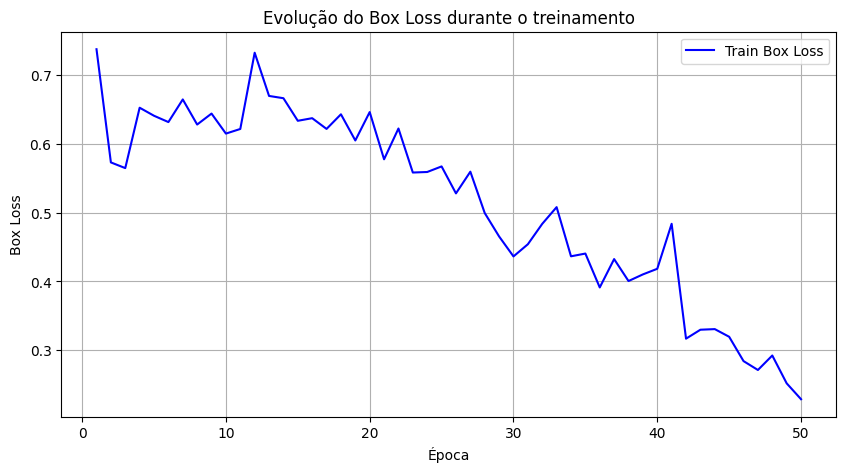

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss', color='blue')
plt.xlabel('Época')
plt.ylabel('Box Loss')
plt.title('Evolução do Box Loss durante o treinamento')
plt.legend()
plt.grid()
plt.show()